# Alucar - Analisando as vendas

In [1]:
import pandas as pd
pd.read_csv('./alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [2]:
alucar = pd.read_csv('./alucar.csv')
print('Qtd. de linhas e colunas: ', alucar.shape)

Qtd. de linhas e colunas:  (24, 2)


In [3]:
print('Qtd. de dados nulos: ', alucar.isna().sum().sum())

Qtd. de dados nulos:  0


In [4]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [5]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [6]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [7]:
print(sns.__version__)

0.9.0


c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


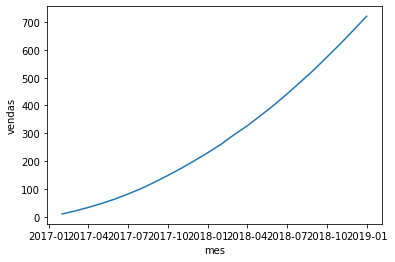

In [8]:
sns.lineplot(x='mes', y='vendas', data=alucar)

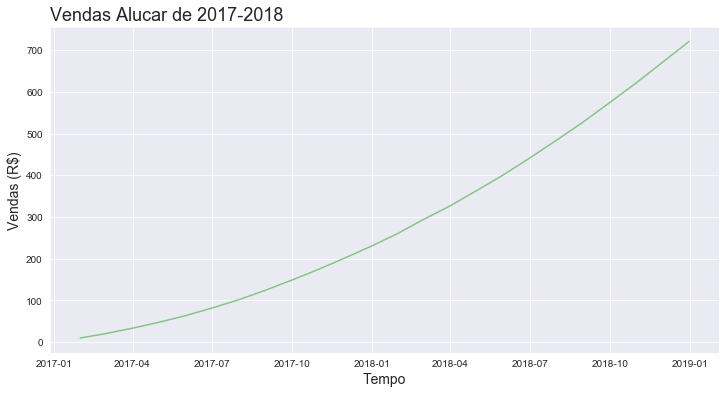

In [9]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017-2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [10]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


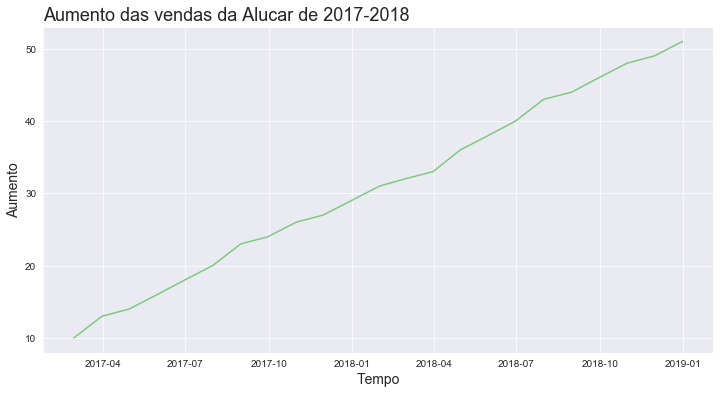

In [11]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017-2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [12]:
def plotarGraf(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

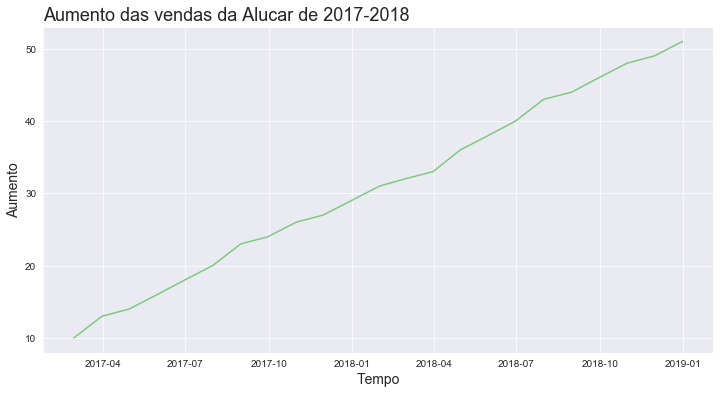

In [13]:
plotarGraf('Aumento das vendas da Alucar de 2017-2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [14]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


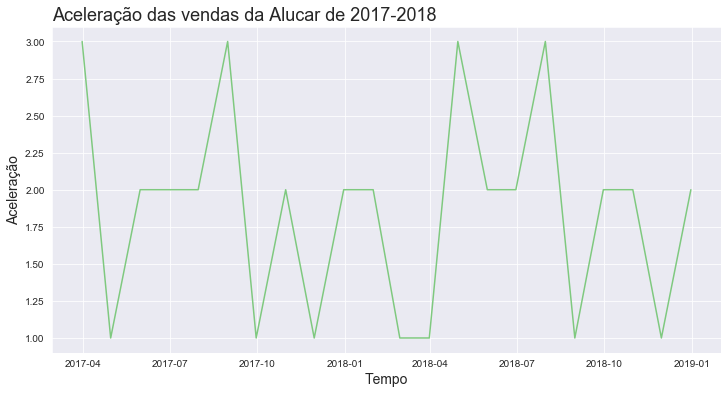

In [15]:
plotarGraf('Aceleração das vendas da Alucar de 2017-2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

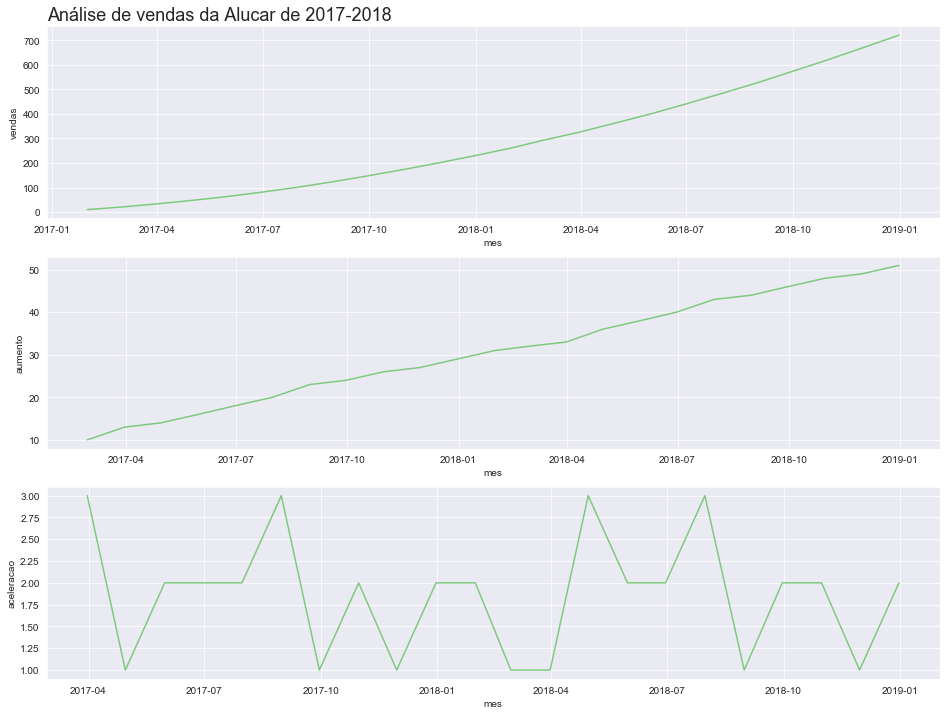

In [16]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017-2018', loc='left', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [17]:
def plotComparacao(titulo, x, y1, y2, y3, dataset):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, loc='left', fontsize=18)
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

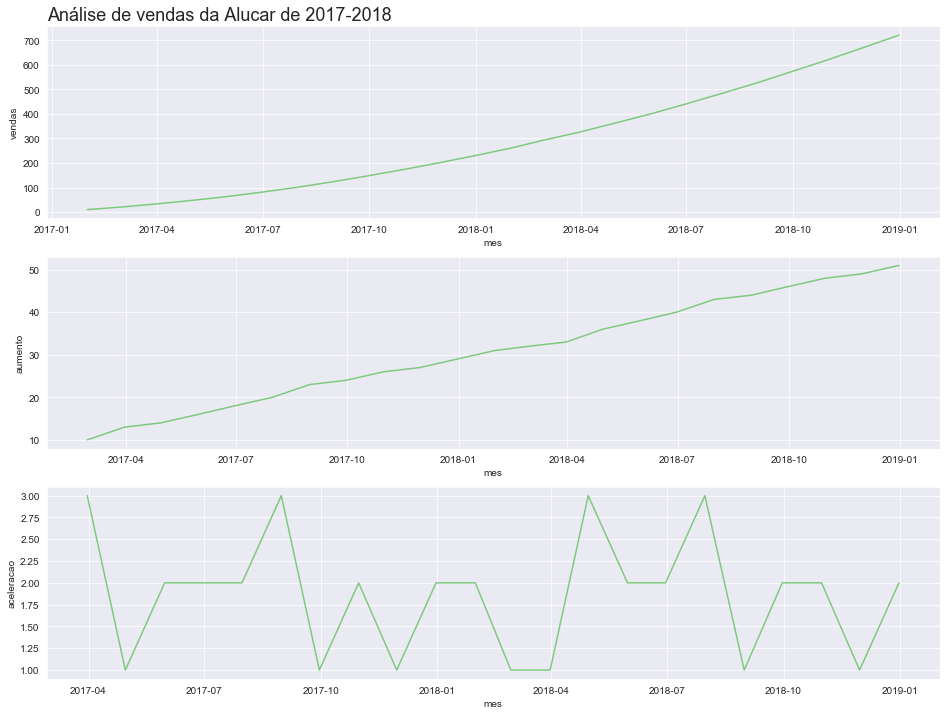

In [18]:
plotComparacao('Análise de vendas da Alucar de 2017-2018', 'mes', 'vendas', 'aumento', 'aceleracao', alucar)

In [19]:
from pandas.plotting import autocorrelation_plot

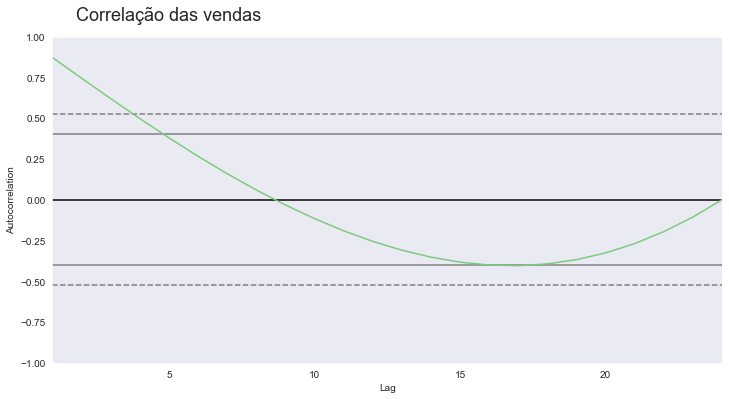

In [20]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

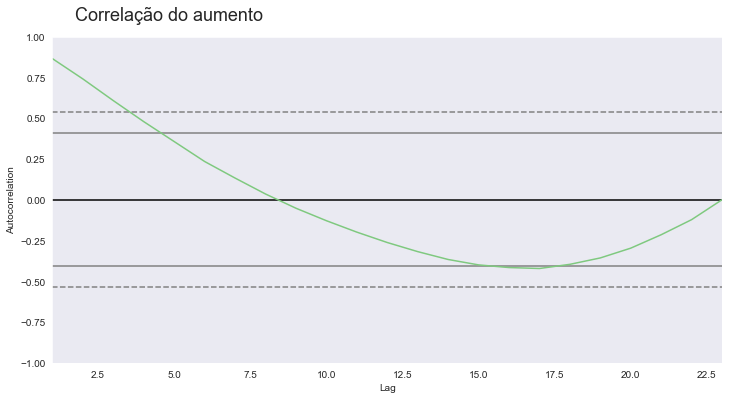

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

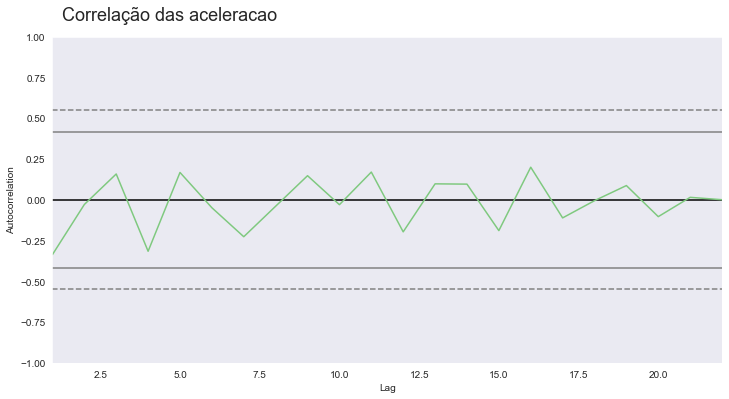

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aceleracao', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [23]:
assinantes = pd.read_csv('./newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [24]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [25]:
print('Qtd. de linhas e colunas: ', assinantes.shape)
print('Qtd. de dados nulos: ', assinantes.isna().sum().sum())

Qtd. de linhas e colunas:  (24, 2)
Qtd. de dados nulos:  0


In [26]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [27]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


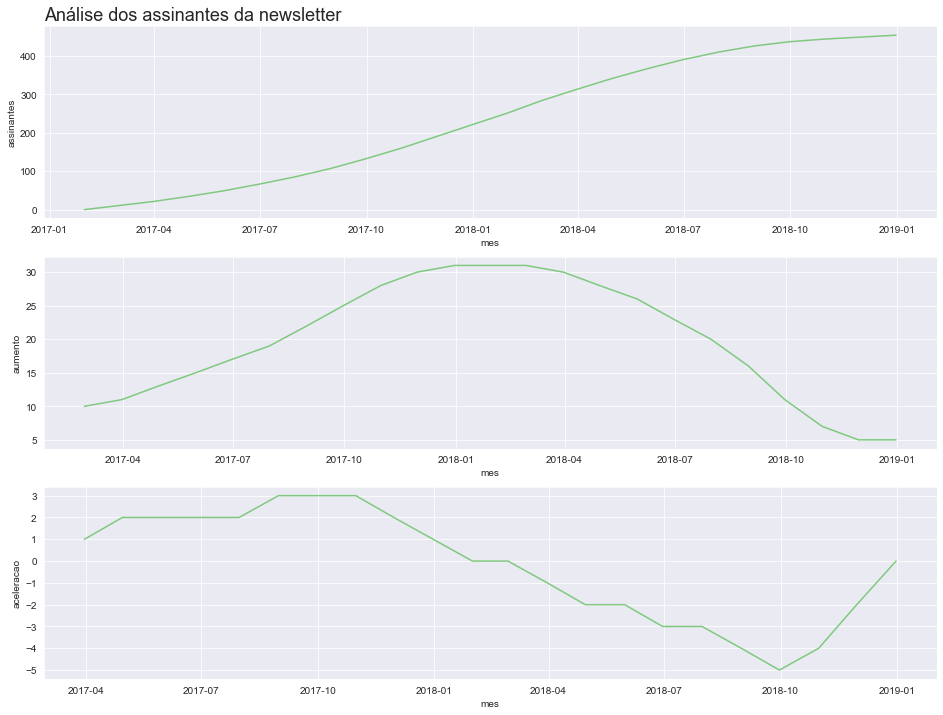

In [28]:
plotComparacao('Análise dos assinantes da newsletter', 'mes', 'assinantes', 'aumento', 'aceleracao', assinantes)

# Chocolura - analisando as vendas

In [29]:
chocolura = pd.read_csv('./chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [30]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [31]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [32]:
print('Qtd. de linhas e colunas: ', chocolura.shape)
print('Qtd. de dados nulos', chocolura.isna().sum().sum())

Qtd. de linhas e colunas:  (24, 2)
Qtd. de dados nulos 0


In [33]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


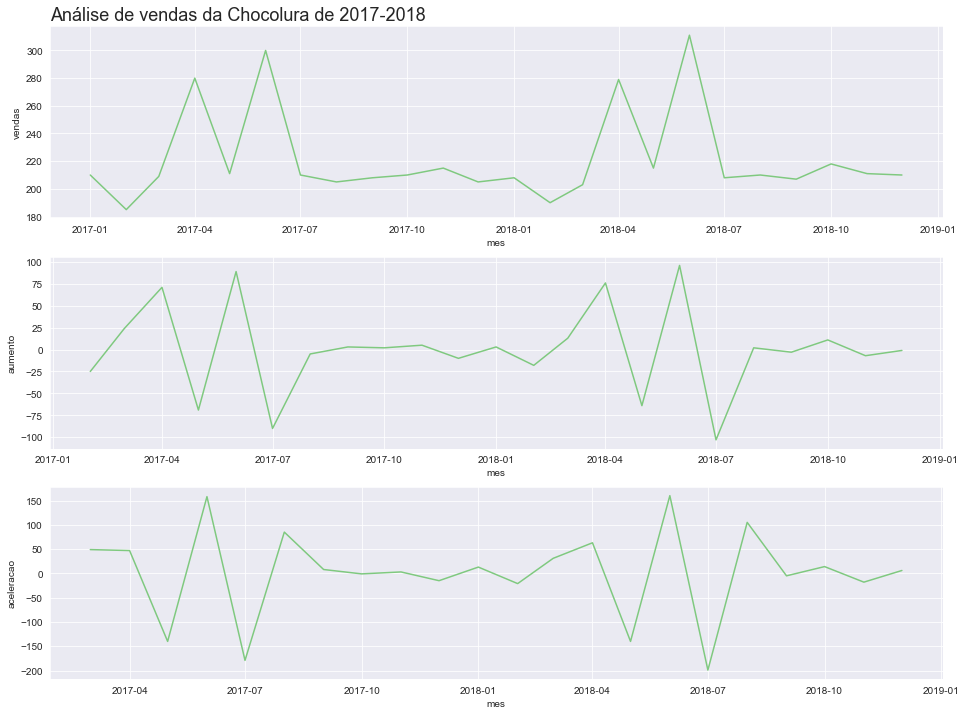

In [34]:
plotComparacao('Análise de vendas da Chocolura de 2017-2018', 'mes', 'vendas', 'aumento', 'aceleracao', chocolura)

# Chocolura - Vendas diárias (Outubro e Novembro)

In [35]:
vendasPorDia = pd.read_csv('./vendas_por_dia.csv')
vendasPorDia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [36]:
print('Qtd. de linhas e colunas: ', vendasPorDia.shape)
print('Qtd. de dados nulos: ', vendasPorDia.isna().sum().sum())

Qtd. de linhas e colunas:  (61, 2)
Qtd. de dados nulos:  0


In [37]:
vendasPorDia.dtypes

dia       object
vendas     int64
dtype: object

In [38]:
vendasPorDia['dia'] = pd.to_datetime(vendasPorDia['dia'])
vendasPorDia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [39]:
vendasPorDia['aumento'] = vendasPorDia['vendas'].diff()
vendasPorDia['aceleracao'] = vendasPorDia['aumento'].diff()
vendasPorDia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


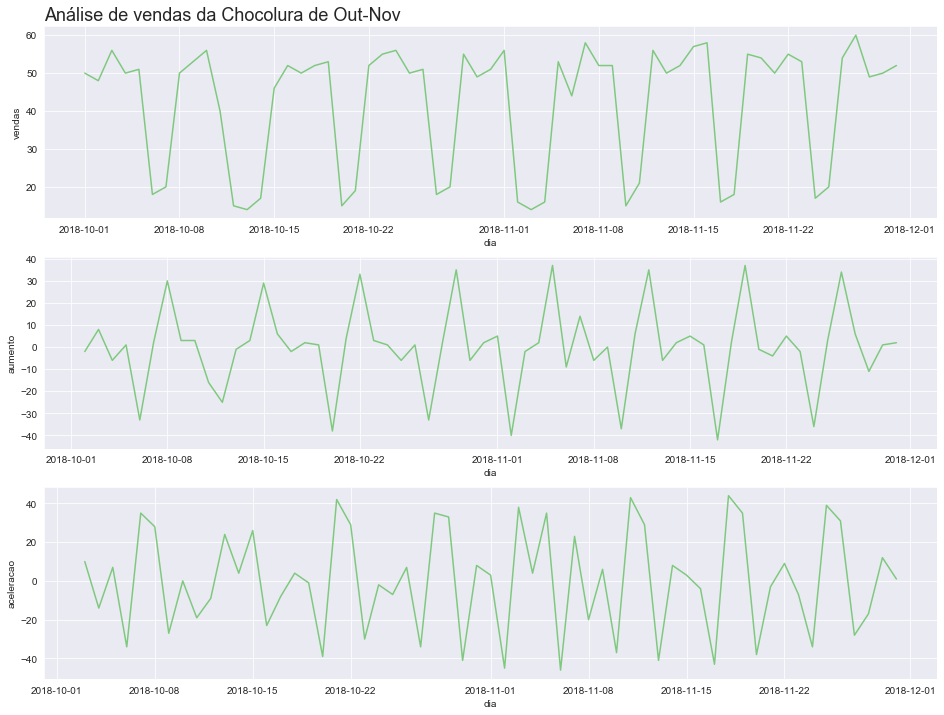

In [40]:
plotComparacao('Análise de vendas da Chocolura de Out-Nov', 'dia', 'vendas', 'aumento', 'aceleracao', vendasPorDia)

In [41]:
vendasPorDia['diaDaSemana'] = vendasPorDia['dia'].dt.weekday_name
vendasPorDia.head()

,dia,vendas,aumento,aceleracao,diaDaSemana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [42]:
vendasPorDia['diaDaSemana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [43]:
diasTraduzidos = {
    'Monday' : 'Segunda', 
    'Tuesday' : 'Terca', 
    'Wednesday' : 'Quarta', 
    'Thursday' : 'Quinta', 
    'Friday' : 'Sexta', 
    'Saturday' : 'Sabado',
    'Sunday' : 'Domingo'
}
vendasPorDia['diaDaSemana'] = vendasPorDia['diaDaSemana'].map(diasTraduzidos)
vendasPorDia.head(7)

,dia,vendas,aumento,aceleracao,diaDaSemana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


**Agrupando os dias**

In [44]:
vendasAgrupadas = vendasPorDia.groupby('diaDaSemana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendasAgrupadas

,vendas,aumento,aceleracao
diaDaSemana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

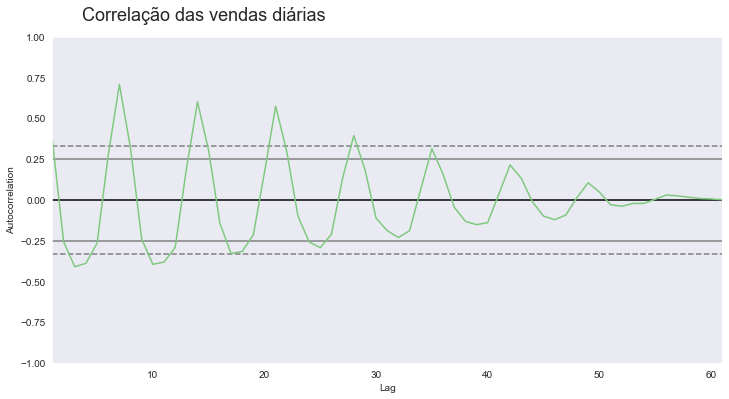

In [46]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendasPorDia['vendas'])
ax = ax

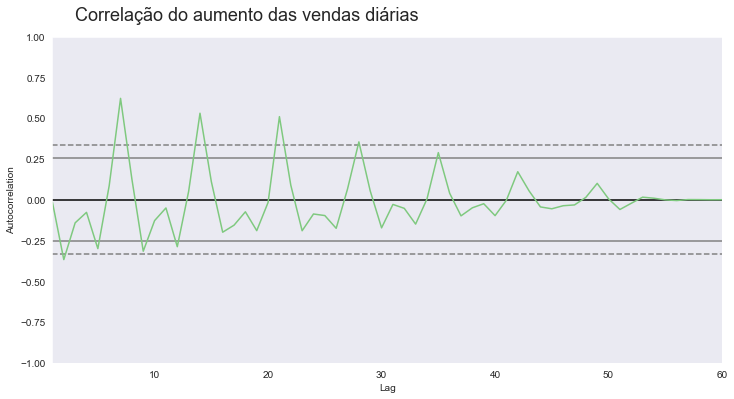

In [48]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendasPorDia['aumento'][1:])
ax = ax

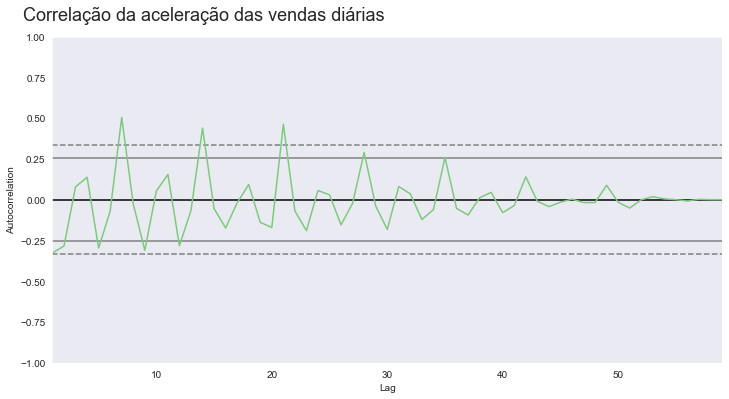

In [50]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendasPorDia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [51]:
cafelura = pd.read_csv('./cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [52]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [53]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [54]:
print('Qtd. de linhas e colunas: ', cafelura.shape)
print('Qtd. de dados nulos: ', cafelura.isna().sum().sum())

Qtd. de linhas e colunas:  (24, 2)
Qtd. de dados nulos:  0


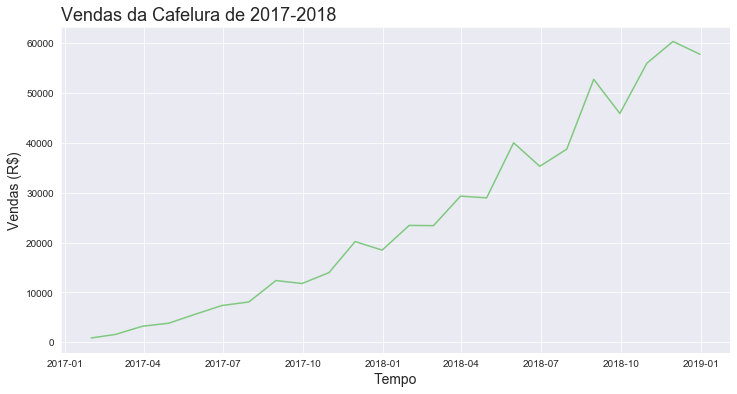

In [58]:
plotarGraf('Vendas da Cafelura de 2017-2018', 'Tempo', 'Vendas (R$)', 'mes', 'vendas', cafelura)

In [60]:
qntdDiasFds = pd.read_csv('./dias_final_de_semana.csv')
qntdDiasFds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [61]:
qntdDiasFds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [62]:
cafelura['vendasNormalizadas'] = cafelura['vendas'] / qntdDiasFds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendasNormalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


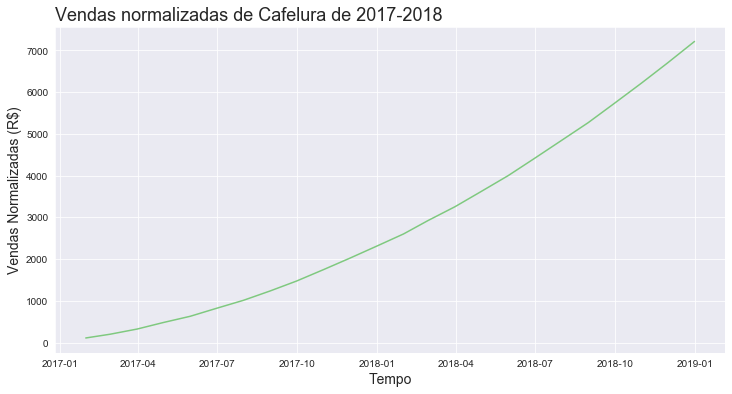

In [63]:
plotarGraf('Vendas normalizadas de Cafelura de 2017-2018', 'Tempo', 'Vendas Normalizadas (R$)', 'mes', 'vendasNormalizadas', cafelura)

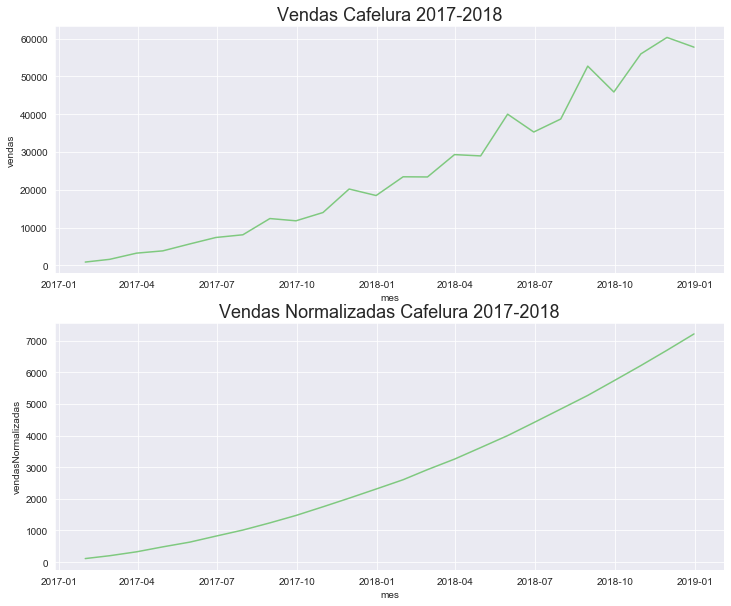

In [65]:
plt.figure(figsize=(12,10))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017-2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017-2018', fontsize=18)
sns.lineplot(x='mes', y='vendasNormalizadas', data=cafelura)
ax = ax

# Statsmodels

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

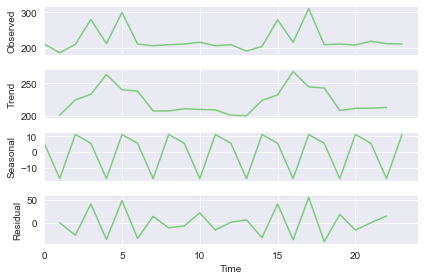

In [71]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [72]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [75]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


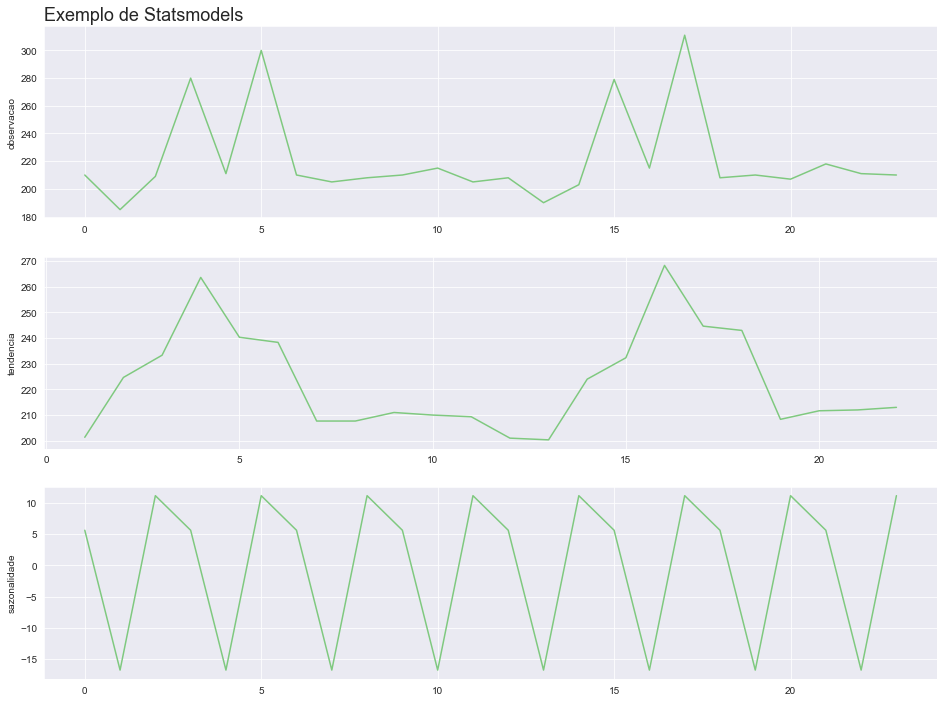

In [76]:
plotComparacao('Exemplo de Statsmodels', resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado)

# Alucel - Análise de vendas

In [77]:
alucel = pd.read_csv('./alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [78]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [79]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [80]:
print('Qtd. de linhas e colunas: ', alucel.shape)
print('Qtd. de dados nulos: ', alucel.isna().sum().sum())

Qtd. de linhas e colunas:  (61, 2)
Qtd. de dados nulos:  0


In [81]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


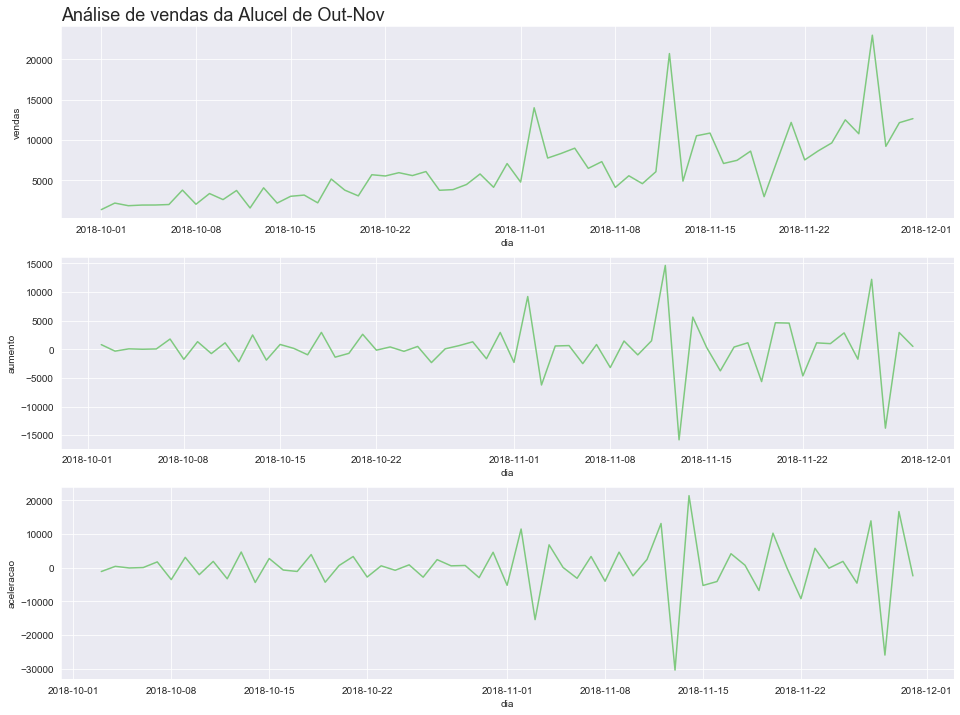

In [82]:
plotComparacao('Análise de vendas da Alucel de Out-Nov', 'dia', 'vendas', 'aumento', 'aceleracao', alucel)

**Média móvel**

In [84]:
alucel['mediaMovel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,mediaMovel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


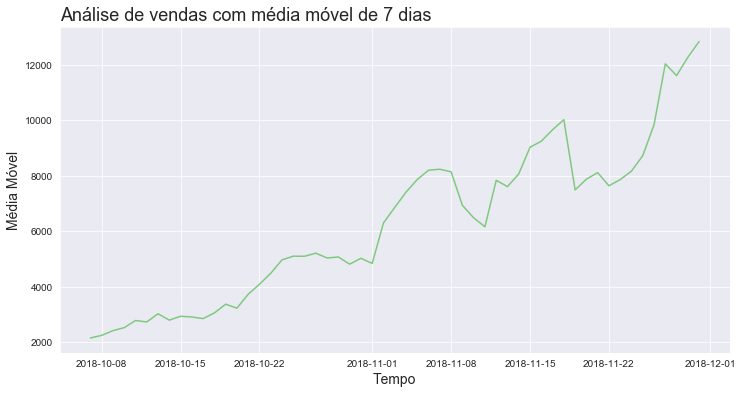

In [86]:
plotarGraf('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'mediaMovel', alucel)

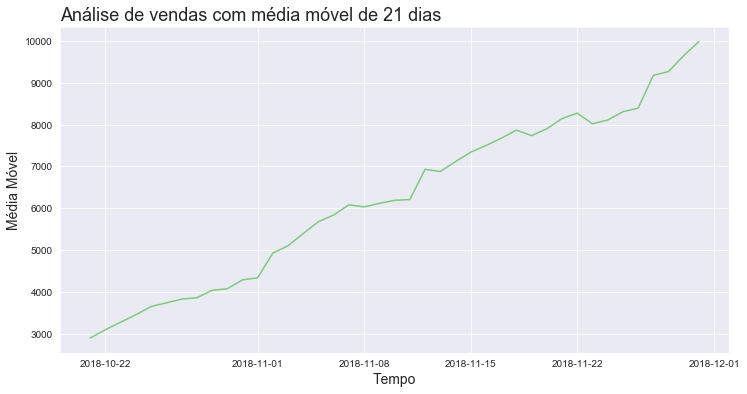

In [88]:
alucel['mediaMovel21'] = alucel['vendas'].rolling(21).mean()
plotarGraf('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'mediaMovel21', alucel)

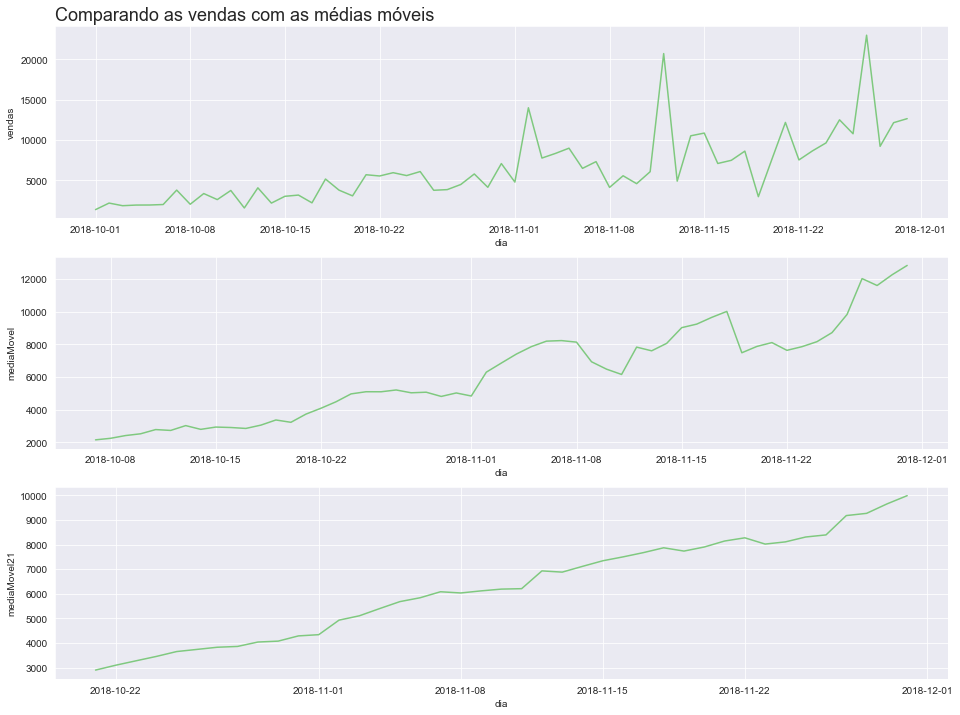

In [90]:
plotComparacao('Comparando as vendas com as médias móveis', 'dia', 'vendas', 'mediaMovel', 'mediaMovel21', alucel)